# Ejercicio 2.1

Con dos dataset (de casos covid y camas ocupadas), determinar si hay variables que puedan ser consideradas normales, y cuáles poseen un comportamiento sospechoso.

In [47]:
import pandas as pd

# URLs
url_casos_covid = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
url_camas_hospital = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'

# Cargo los datasets
casos_covid = pd.read_csv(url_casos_covid)
camas_hospital = pd.read_csv(url_camas_hospital)

# Contar el número de filas
filas_antes_covid = casos_covid.shape[0]
filas_antes_camas = camas_hospital.shape[0]
print(f"Las filas son \n \t COVID: {filas_antes_covid} \n \t Camas: {filas_antes_camas}")

Las filas son 
 	 COVID: 88 
 	 Camas: 88


### Me fijo que datos pueden ser analizados para normalidad

In [48]:
# Mostrar las columnas de cada DataFrame
print("Columnas en Datos de Casos de COVID:")
print(casos_covid.columns)
casos_covid.drop(columns=['fecha', 'aprehendidos'], inplace=True) # Borro aprehendidos, son todos cero

print("\nColumnas en Datos de Camas de Hospital:")
print(camas_hospital.columns)

# Descarto columnas innecesarias
camas_hospital.drop(columns=['observaciones', 'fecha', 'informeNumero'], inplace=True)

Columnas en Datos de Casos de COVID:
Index(['fecha', 'confirmados', 'activos', 'recuperados', 'decesos',
       'descartados', 'sospechosos', 'contencion_psicologica',
       'monitoreo_epidemiologico', 'aislamiento_por_contacto_estrecho',
       'aprehendidos'],
      dtype='object')

Columnas en Datos de Camas de Hospital:
Index(['informeNumero', 'fecha', 'total_camas_hospitales',
       'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales',
       'camas_covid', 'camas_sospechosos_covid', 'camas_confirmados_covid',
       'porcentaje_ocupacion_camas_covid', 'uti_covid_totales',
       'uti_covid_ocupadas', 'respiradores_totales', 'respiradores_ocupados',
       'respiradores_covid_totales', 'respiradores_covid_ocupados',
       'total_camas_ucma', 'total_camas_ocupadas_ucma', 'sedes_ucma',
       'observaciones'],
      dtype='object')


### Histogramas y Quantile-Quantile plots


Los Q-Q plots sirven para saber, comparando los cuantiles, cuanto se acerca el set de datos a una distribucion normal, se ve como en la mayoria de los casos se desvia.

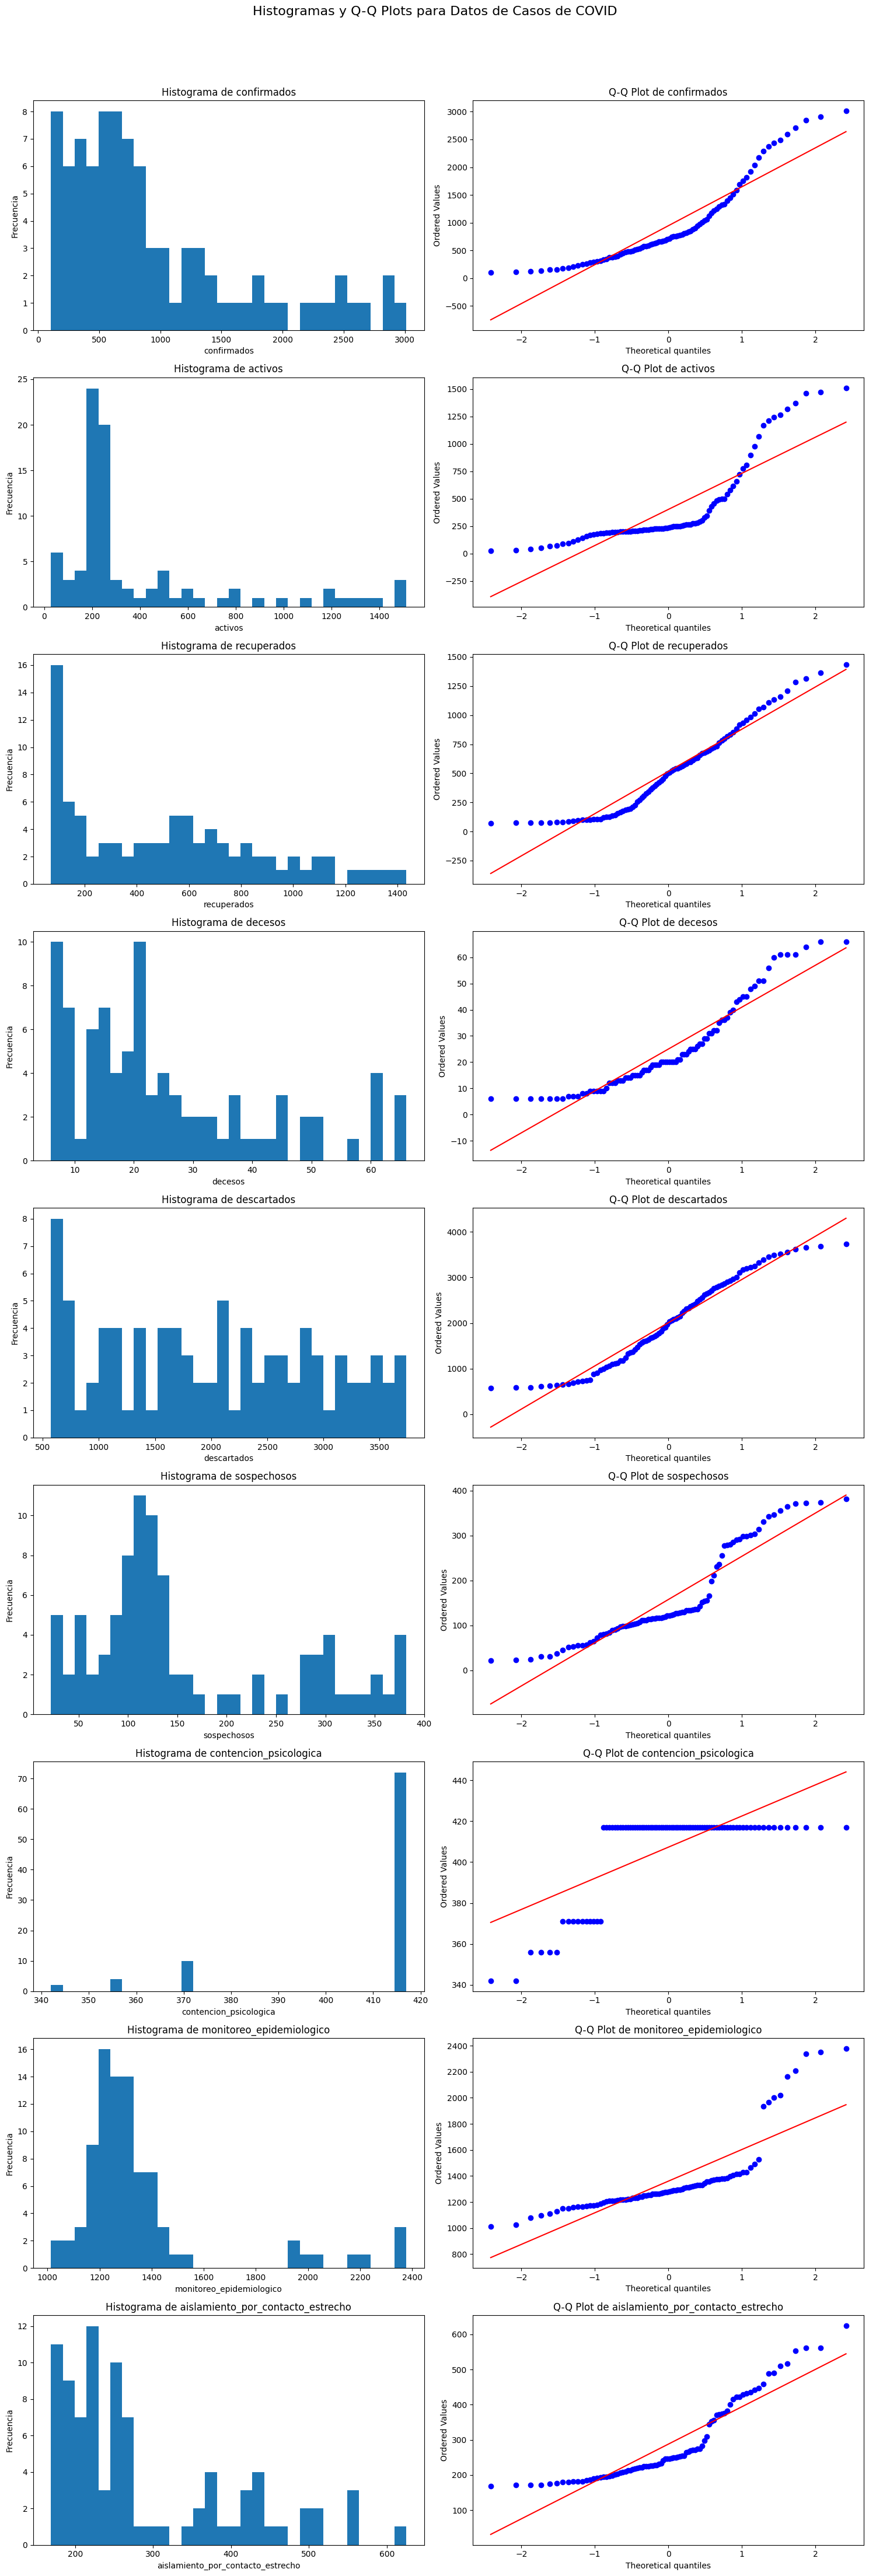

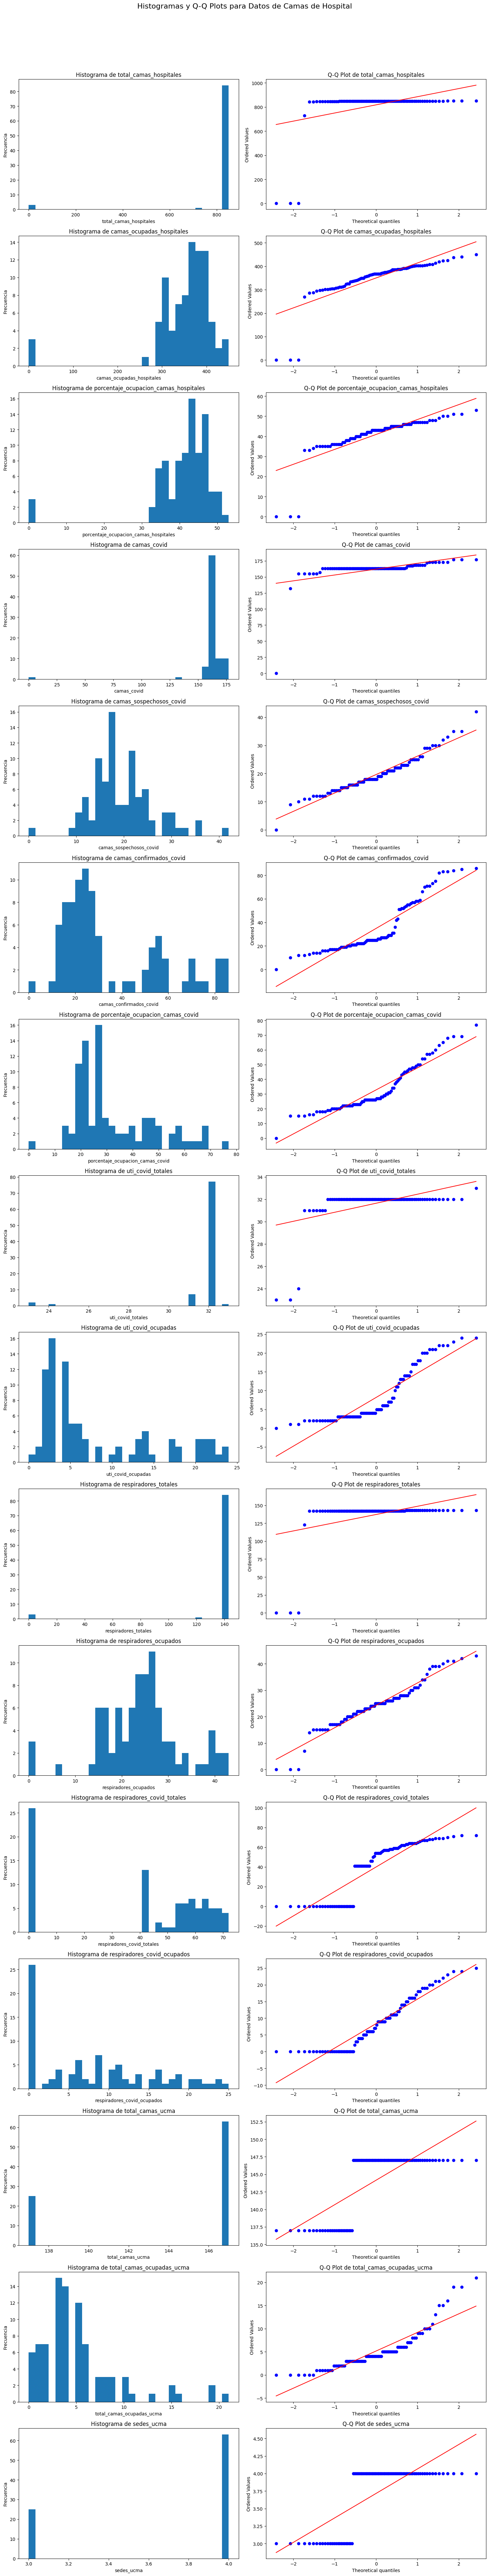

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Función para crear histogramas y Q-Q plots en un layout compacto
def plot_histograms_qq(df, title):
    num_columns = len(df.columns)
    num_rows = num_columns  # Una fila por columna, dos gráficos por fila
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    fig.suptitle(title, fontsize=16)
    
    for i, column in enumerate(df.columns):
        # Histograma
        ax_hist = axes[i, 0]
        df[column].hist(bins=30, ax=ax_hist)
        ax_hist.set_title(f'Histograma de {column}')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frecuencia')
        ax_hist.grid(False)
        
        # Q-Q Plot
        ax_qq = axes[i, 1]
        probplot(df[column].dropna(), dist="norm", plot=ax_qq)
        ax_qq.set_title(f'Q-Q Plot de {column}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Crear histogramas y Q-Q plots para cada DataFrame en un layout compacto
plot_histograms_qq(casos_covid, "Histogramas y Q-Q Plots para Datos de Casos de COVID")
plot_histograms_qq(camas_hospital, "Histogramas y Q-Q Plots para Datos de Camas de Hospital")


### Pruebas de normalidad

In [50]:
from scipy.stats import shapiro

# Función para realizar la prueba de Shapiro-Wilk
# info: https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
def prueba_normalidad(datos, columna):
    h = 0
    estadistico, p = shapiro(datos[columna])
    if p > 0.05:
        h = h+1
        print(f'No hay evidencia para rechazar que {columna} venga de una dist. Gaussiana')
    else:
        pass
    return h

# Aplicar la prueba de normalidad a las columnas relevantes
for columna in casos_covid.columns:
    h = prueba_normalidad(casos_covid, columna)
print(f'Parecen haber {h} distribuciones Gaussianas en casos de COVID')

for columna in camas_hospital.columns:
    prueba_normalidad(camas_hospital, columna)
print(f'Parecen haber {h} distribuciones Gaussianas en casos camas de hospital')

Parecen haber 0 distribuciones Gaussianas en casos de COVID
Parecen haber 0 distribuciones Gaussianas en casos camas de hospital


**Parece no existir distribuciones Gaussianas**

### Identificacion de variables sospechosas

Los comportamientos sospechosos se pueden distinguir de los graficos. Existen distribuciones que no son normales claramente por sus outliers, como lo muestran los Q-Q plot pero mas evidentemente los histogramas, un caso claro es cama_ocupadas_hospitales. 

# Ejercicio 2.2

Generar un dataset similar al de la página 12 de las diapositivas de la Clase 2 (conjuntos Gaussianos con diferente media y DS). Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error.

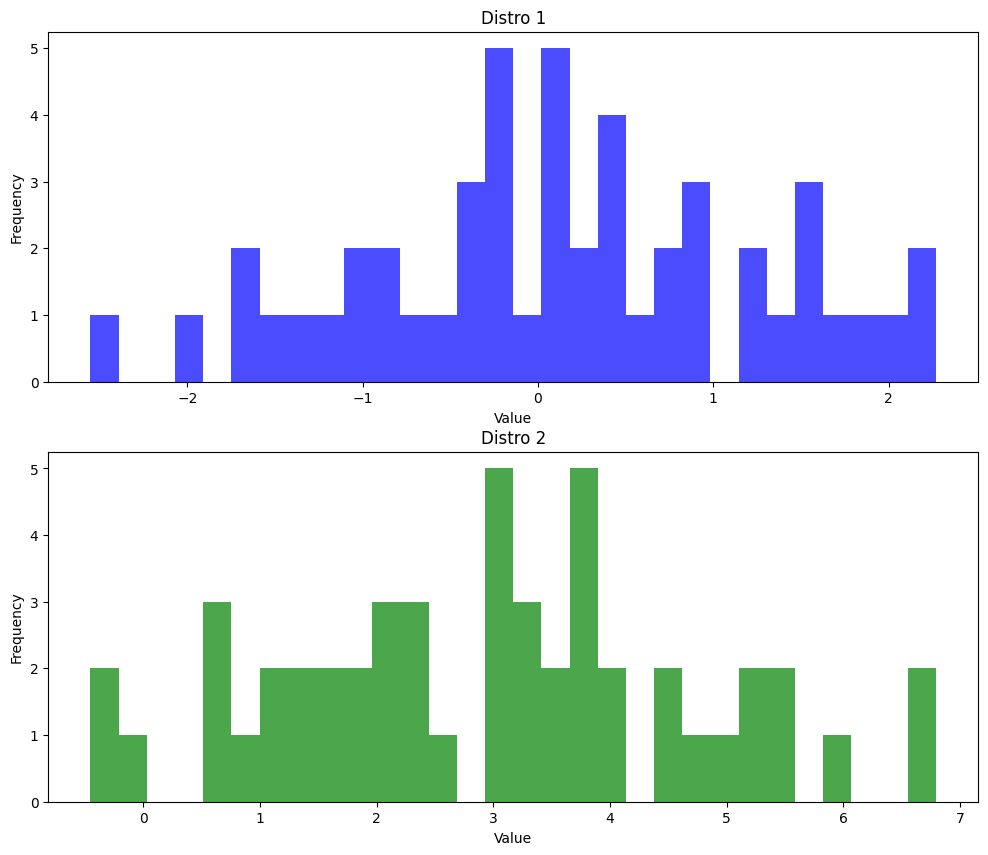

[0.62699549 0.21901714 0.37478465 0.75867448 0.65819223 0.04394264
 0.36601278 0.11967362 0.12649397 0.2213711  0.16691201 0.52812499
 0.31054379 0.162868   0.22899079 0.20445278 0.54112744 0.1124293
 0.20008727 0.05126125 0.00577289 0.28117994 0.34033106 0.05889842
 0.76554427 0.02397833 0.14973033 0.11480593 0.5537155  0.53305803
 0.16891225 0.21411764 0.0491522  0.01215817 0.09503981 0.16917073
 0.45475816 0.44568771 0.09068123 0.10031664 0.04017467 0.02505673
 0.0173429  0.68233219 0.07827961 0.08533484 0.03101799 0.3151877
 0.01953546 0.11143973 0.44785779 0.95922638 0.69013856 0.27724732
 0.88776428 0.96327505 0.91025724 0.94961591 0.61690199 0.76666486
 0.59297324 0.76815909 0.50170951 0.08386147 0.93137594 0.74782731
 0.10539284 0.96634461 0.44018791 0.90708197 0.98298764 0.9227856
 0.9941422  0.24965254 0.96078284 0.58512323 0.46392541 0.65069293
 0.78984513 0.90801175 0.28546726 0.9890956  0.96658972 0.13101991
 0.99764808 0.99919237 0.99471462 0.84152759 0.33858189 0.9926889

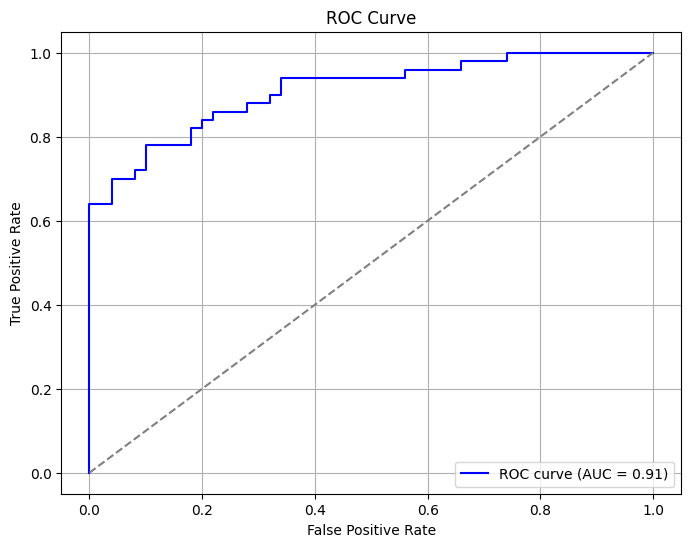

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

np.random.seed(0)

# Distribuciones Gaussianas
mean1, std_dev1 = 0, 1 
mean2, std_dev2 = 3, 2 

# Generacion de data
x1 = np.random.normal(mean1, std_dev1, 50)
x2 = np.random.normal(mean2, std_dev2, 50)
y1 = np.zeros(50)  # Label A o 0
y2 = np.ones(50)   # Label B o 1

#================================================================
#                       Histograms
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].hist(x1, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Distro 1')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(x2, bins=30, color='green', alpha=0.7)
axes[1].set_title('Distro 2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
#================================================================
plt.show()

# Concatenacion
X = np.concatenate((x1, x2)).reshape(-1, 1)  # Reshape a vector columna
y = np.concatenate((y1, y2))  

# Train de un logistic regression classifier (Ref: https://www.geeksforgeeks.org/understanding-logistic-regression/)
clf = LogisticRegression()
clf.fit(X, y)

# Computo las predicciones
y_probs = clf.predict_proba(X)[:, 1]
print(y_probs)

#================================================================
#                           Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr) # = 0.91 un buen clasificador
print(f"ROC AUC: {roc_auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
#================================================================



# Ejercicio 3.1

Exactitud: 0.75
Precisión: 0.7857142857142857
Recall: 0.673469387755102
F1-Score: 0.7252747252747253


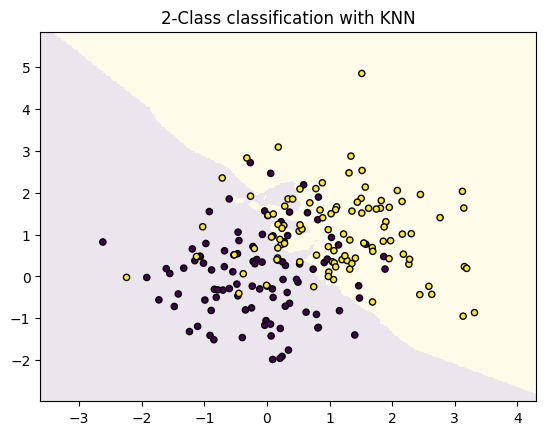

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Parámetros para las distribuciones gaussianas
centroide_A = [0, 0]
#Se nota que cuando la covarianza no es independiente, el criterio comienza
# a tener problemas para detectar bien
covarianza_A = [[1, 0], [0, 1]]  # Diagonal para covarianza independiente

centroide_B = [1, 1]
covarianza_B = [[1, 0], [0, 1]]

# Generamos los datos
np.random.seed(42) 
datos_A = np.random.multivariate_normal(centroide_A, covarianza_A, 100)
datos_B = np.random.multivariate_normal(centroide_B, covarianza_B, 100)

# Etiquetas para los datos
etiquetas_A = np.zeros(100)  # Clase 0
etiquetas_B = np.ones(100)   # Clase 1

# Unimos los datos
X = np.concatenate([datos_A, datos_B])
y = np.concatenate([etiquetas_A, etiquetas_B])

#====================================================
#                K Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Creamos y entrenamos el clasificador K-NN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Evaluamos el clasificador
y_pred = knn.predict(X_test)

print(f'Exactitud: {accuracy_score(y_test, y_pred)}')
print(f'Precisión: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')

#====================================================

#====================================================
#     Visualización de la frontera de decisión
h = .02  # Tamaño de paso 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification with KNN")
plt.show()
#====================================================

# Ejercicio 3.3

In [53]:
import pandas as pd

# Importo el archivo de Github
url = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv"
data = pd.read_csv(url)

# Previsualizacion
print(data.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

In [54]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [55]:
print(data.describe()) #print(data.isnull().sum()) -> No hay datos nulos

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

In [56]:
# Normalizar las características numéricas
from sklearn.preprocessing import StandardScaler

features = data.drop(['artist', 'target', 'song_title'], axis='columns')  # Asumiendo que 'gustada' es la etiqueta
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características normalizadas
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Agrego la columna de etiquetas al DataFrame
features_scaled_df['target'] = data['target']

Los datos ya fueron analizados, y se descartaron las columnas "artist" y "song_title" de los features.

In [57]:
from sklearn.model_selection import train_test_split

X = features_scaled_df.drop('target', axis=1)
y = features_scaled_df['target']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Entrenamiento del modelo KNN


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Seleccionar un valor de k
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

Evaluación del modelo

[[287   9]
 [ 33 277]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       296
           1       0.97      0.89      0.93       310

    accuracy                           0.93       606
   macro avg       0.93      0.93      0.93       606
weighted avg       0.93      0.93      0.93       606

ROC AUC: 0.98


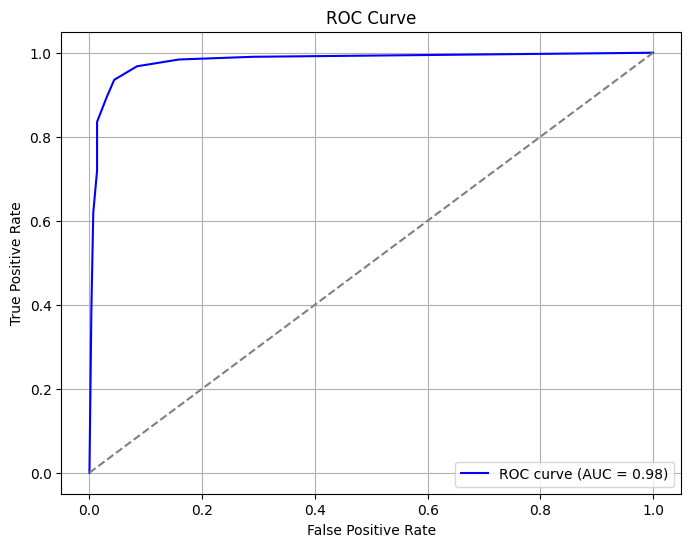

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calcular el AUC-ROC del ejercicio anterior
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Conclusion
El criterio AUC ROC dio 0.98, lo cual concluye que el clasificador es muy certero.

# Ejercicio 4

In [60]:
import pandas as pd
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
# Información general del dataset
print(cancer_tissues.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
# Eliminar la columna 'Unnamed: 32' 
if 'Unnamed: 32' in cancer_tissues.columns:
    cancer_tissues = cancer_tissues.drop(['Unnamed: 32'], axis=1)
    
# Malign es 1 y benign es 0
cancer_tissues['diagnosis'] = cancer_tissues['diagnosis'].map({'M': 1, 'B': 0})

# Separar las características y la etiqueta
X = cancer_tissues.drop(['id', 'diagnosis'], axis=1)
y = cancer_tissues['diagnosis']

# Normalizar las características numéricas (0-1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Regresion logistica

Division entre conjunto de entrenamiento y de prueba

In [63]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Entrenamiento del modelo de regresion logistica

In [64]:
from sklearn.linear_model import LogisticRegression

# Regresion logistica (ayuda en: https://www.geeksforgeeks.org/understanding-logistic-regression/)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Evaluacion del modelo

__________________________________________________________
Matriz de contingencia: 
[[106   2]
 [  1  62]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

ROC AUC: 0.98
Exactitud: 0.98
__________________________________________________________


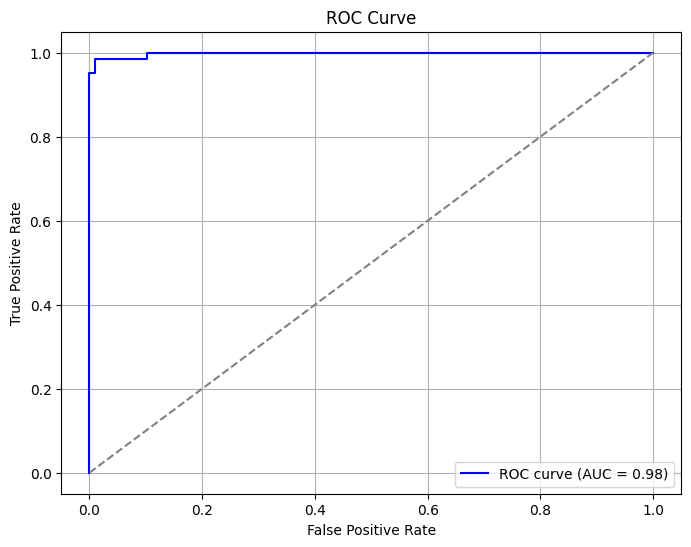

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluar el rendimiento del modelo
print("__________________________________________________________")
print(f"Matriz de contingencia: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report: \n{classification_report(y_test, y_pred)}")

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy:.2f}')
print("__________________________________________________________")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Conclusiones 
Se tiene una curva ROC muy 'linda'. El parametro ROC AUC da 1, lo cual indica que el clasificador funciona satisfactoriamente.

## Arboles de decision
Comienzo entrenando el modelo

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Evaluacion

__________________________________________________________
Matriz de contingencia: 
[[101   7]
 [  3  60]]
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

ROC AUC: 0.94
Exactitud: 0.94
__________________________________________________________


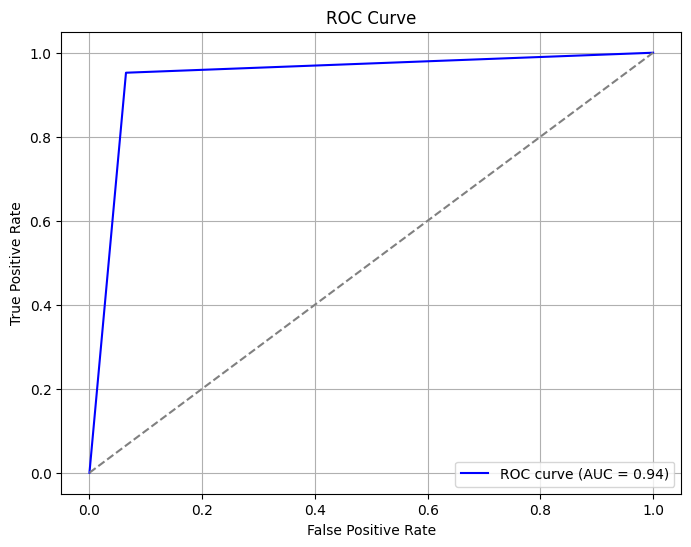

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluar el rendimiento del modelo
print("__________________________________________________________")
print(f"Matriz de contingencia: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report: \n{classification_report(y_test, y_pred)}")

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy:.2f}')
print("__________________________________________________________")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Conclusiones
Aunque los arboles son mas intuitivos debido a su forma natural de predecir, es evidente que en comparacion con la regresion logistica los resultados son menos precisos. La curva ROC tiene dos tramos porque solo existen dos categorias: M y B. El AUC-ROC de 0.94 indica que se trata de un buen clasificador aunque no tan bueno como el primero.

## Perceptrones
Entrenamiento

In [68]:
from sklearn.linear_model import Perceptron

# Entrenar el modelo de perceptrón
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)


Evaluacion

__________________________________________________________
Matriz de contingencia: 
[[102   6]
 [  1  62]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC: 0.96
Exactitud: 0.96
__________________________________________________________


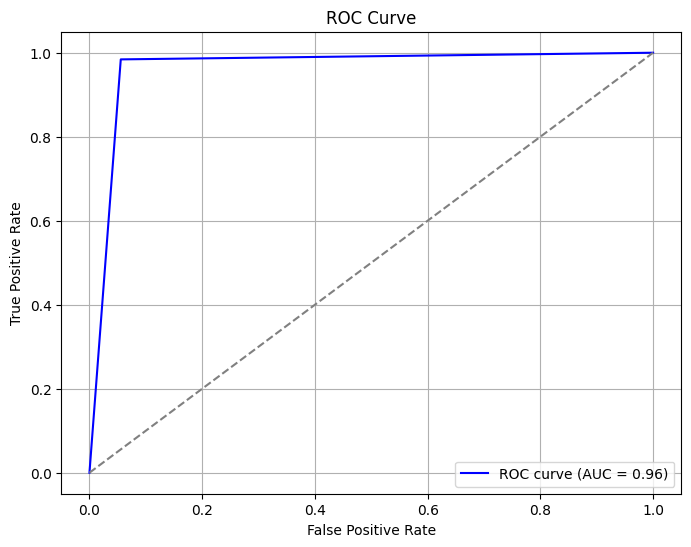

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Evaluar el rendimiento del modelo
print("__________________________________________________________")
print(f"Matriz de contingencia: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification report: \n{classification_report(y_test, y_pred)}")

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy:.2f}')
print("__________________________________________________________")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Conclusion
Nuevamente, un buen clasificador, un poco mejor que el arbol de decision pero menos que la regresion logistica. Creo entender por que la curva ROC posee dos tramos.

## Conclusiones generales
Para expandir la evaluacion de los clasificadores, inclui la matriz de contingencia al analisis, asi como el reporte. De la matriz de contingencia, noto que la cantidad de FP y FN en el primer clasificador (regresion logistica) es menor que en los otros casos:

regresion logistica (RL)
| 106 | 2  |
| --- | -- |
| 1   | 62 |
 
arboles de decision (AD)
| 101 | 7  |
| --- | -- |
| 3   | 60 |

perceptrones (P)
| 102 | 6  |
| --- | -- |
| 1   | 62 |

Esto respalda lo que se ha obtenido con el AUC-ROC (precision de modelo en orden 1. RL 2. P 3. AD). Los resultados del reporte tambien son concluyentes de la misma manera, y al ser redundante su analisis lo obvio. 

# Ejercicio 5
Nota: quise hacer el del chatbot pero ya no existe tal link ni ningun otro. Utilizo el link de Kaggle a un dataset de estrellas con las siguientes caracteristicas:

* Absolute Temperature (in K)
* Relative Luminosity (L/Lo)
* Relative Radius (R/Ro)
* Absolute Magnitude (Mv)
* Star Color (white,Red,Blue,Yellow,yellow-orange etc)
* Spectral Class (O,B,A,F,G,K,,M)
* Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
* Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
* Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar el dataset
star = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')

# Mostrar las primeras filas del dataset
print(star.head())
star.describe()

print(f"\nStar categories: \n{star['Star category'].value_counts()}")

   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  

Star categories: 
Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64


In [71]:
# Separar características numéricas y categóricas
numeric_features = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
categorical_features = ['Star type','Star category','Star color', 'Spectral Class']


# Preprocesamiento
numeric_transformer = StandardScaler() # normalizacion de caracteristicas numericas
categorical_transformer = OneHotEncoder() # categorias a numeros

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline de preprocesamiento
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesamiento
X = pipeline.fit_transform(star)

# Las etiquetas verdaderas para calcular las métricas de homogeneidad y completitud
true_labels = star['Star type']

## K-Means
Implementacion y evaluacion

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Rendimiento
print("___________________________________________________")
print("Intrinseco: ")
silhouette_avg = silhouette_score(X, labels)
print(f'\t Coeficiente de silueta: {silhouette_avg:.2f}')

# Calcular Homogeneidad y Completitud
homogeneity = homogeneity_score(labels, true_labels)
completeness = completeness_score(labels, true_labels)

print("Extrinseco: ")
print(f'\t Homogeneidad: {homogeneity:.2f}')
print(f'\t Completitud: {completeness:.2f}')
print("___________________________________________________")

___________________________________________________
Intrinseco: 
	 Coeficiente de silueta: 0.50
Extrinseco: 
	 Homogeneidad: 0.96
	 Completitud: 0.84
___________________________________________________


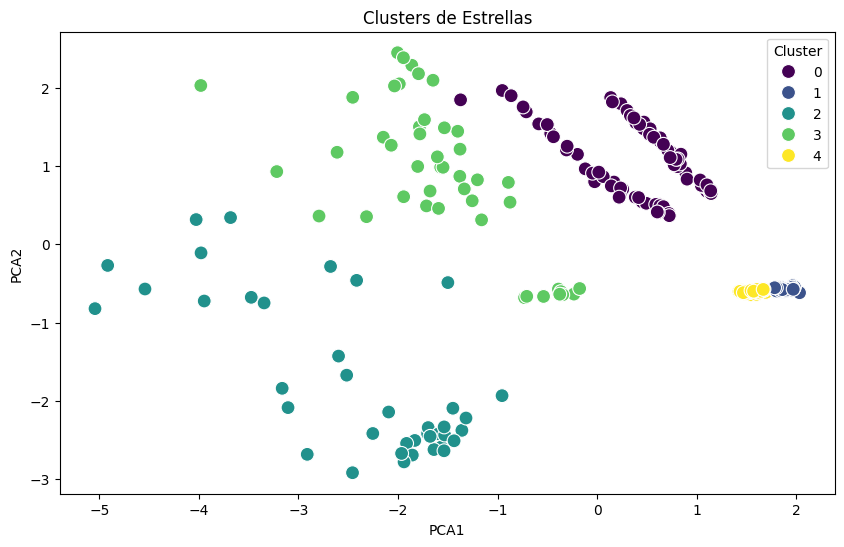

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Agregar las etiquetas de los clusters al DataFrame original
star['Cluster'] = labels

# Reducir la dimensionalidad para visualización (usaremos PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters de Estrellas')
plt.show()

## DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Filtrar los clusters que no son ruido
filtered_labels = labels[labels != -1]
filtered_X = X[labels != -1]
filtered_true_labels = true_labels[labels != -1]

# Evaluar el rendimiento con silhouette score
print("___________________________________________________")
print("Intrinseco: ")
silhouette_avg = silhouette_score(filtered_X, filtered_labels)
print(f'\t Coeficiente de silueta: {silhouette_avg:.2f}')

# Calcular Homogeneidad y Completitud
homogeneity = homogeneity_score(filtered_true_labels, filtered_labels)
completeness = completeness_score(filtered_true_labels, filtered_labels)

print("Extrinseco: ")
print(f'\t Homogeneidad: {homogeneity:.2f}')
print(f'\t Completitud: {completeness:.2f}')
print("___________________________________________________")

___________________________________________________
Intrinseco: 
	 Coeficiente de silueta: 0.83
Extrinseco: 
	 Homogeneidad: 1.00
	 Completitud: 0.79
___________________________________________________


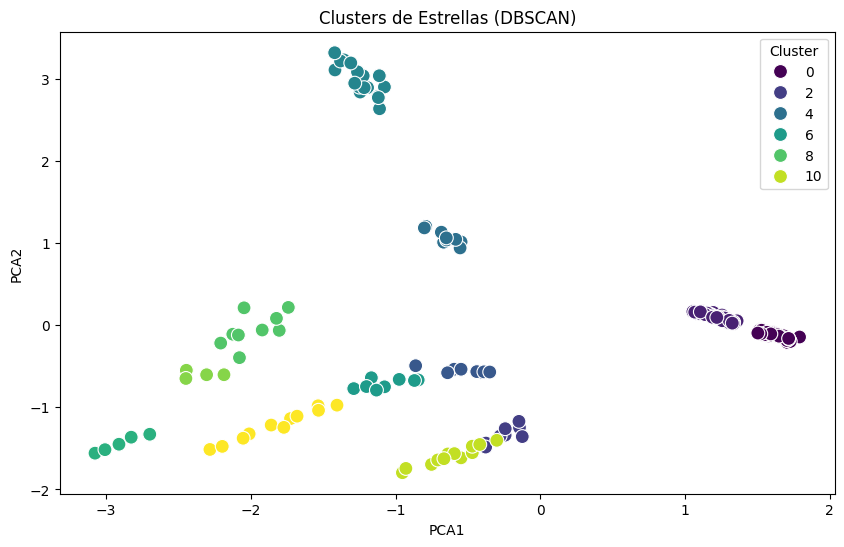

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducir la dimensionalidad para visualización (usaremos PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(filtered_X)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = filtered_labels

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters de Estrellas (DBSCAN)')
plt.show()

## Conclusiones
He aplicado dos algoritmos de clustering: K-Means y DBSCAN. Como un medio de evaluacion de su desempeno utilice Silhouette Index (referencia de uso en https://www.geeksforgeeks.org/silhouette-index-cluster-validity-index-set-2/ y las clases). Este indice se espera `-1<S<1`. De la referencia tengo lo siguiente de acuerdo a sus valores:
* If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.
* If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters
* If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.

El primer valor para K-Means S = 0.5, describe que se trata de un algoritmo de clustering regular. Por el contrario, el algoritmo de DBSCAN posee un S = 0.83, cuyo valor cercano a 1 indica que se trata de un buen algoritmo de clustering aplicado a este set de datos.

El describe de las categorias devuelve lo siguiente:
```Star categories: 
Star category
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64 
```
con lo cual es de esperar que existan *6 labels*, que se comprueba con el DBSCAN y no lo hace el K-Means. En sisnteis, la yuxtaposicion de los metodos pone en evidencia la eficiencia del DBSCAN y el desempeno mas bien regular del K-Means.

# Ejercicio 6

El dataset tiene: 
      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Verifico que no haya nulos:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        

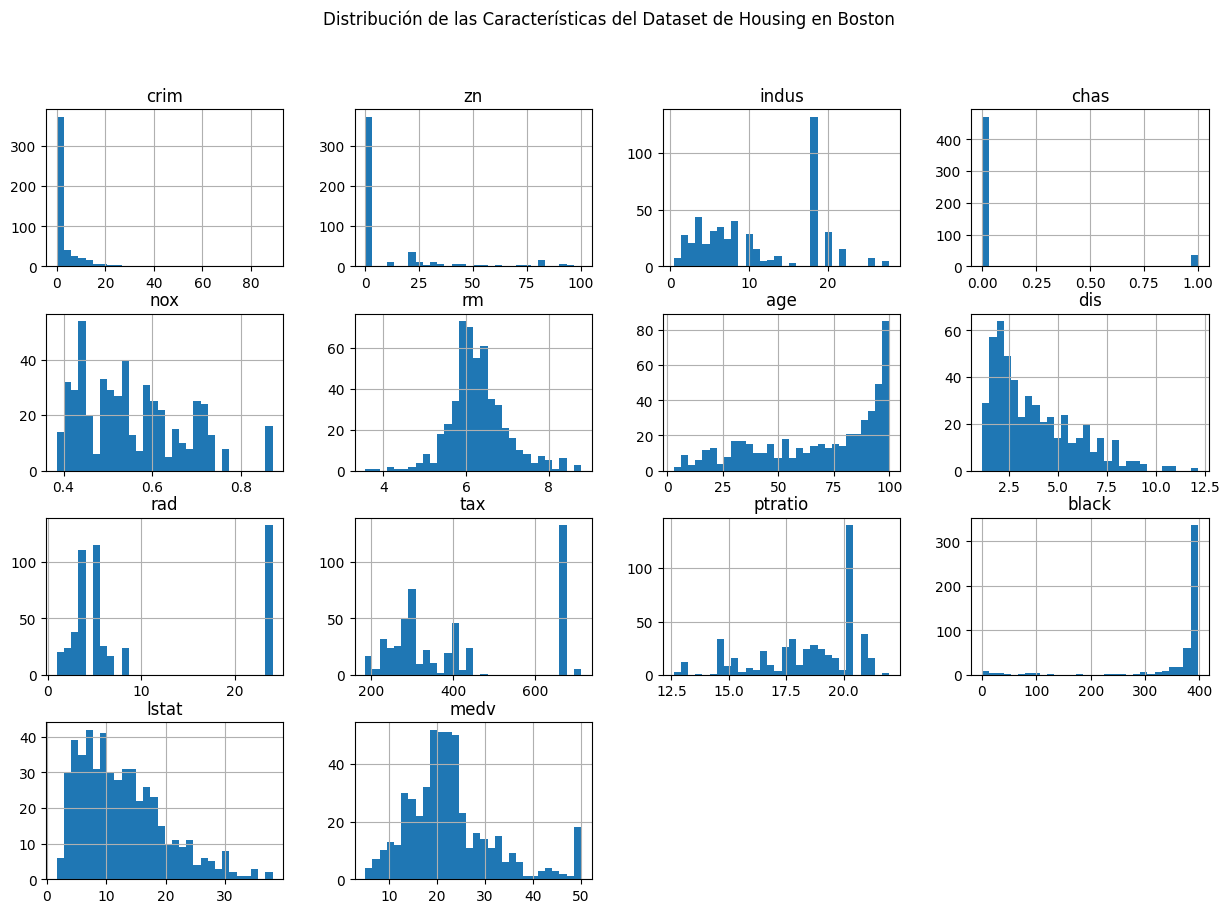

In [90]:
# Nombres de las columnas que saque de Kaggle
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Cargar el dataset 
housing = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=column_names)

print(f"El dataset tiene: \n{housing.head()}")

print(f"Verifico que no haya nulos:")
print(housing.isnull().sum())
print(housing.isna().sum())

# Crear el panel de histogramas
housing.hist(bins=30, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Distribución de las Características del Dataset de Housing en Boston')
plt.show()

## Regresion lineal simple
Entrenamiento y testeo

Error Cuadrático Medio (MSE): 21.52
Coeficiente de Determinación (R²): 0.71


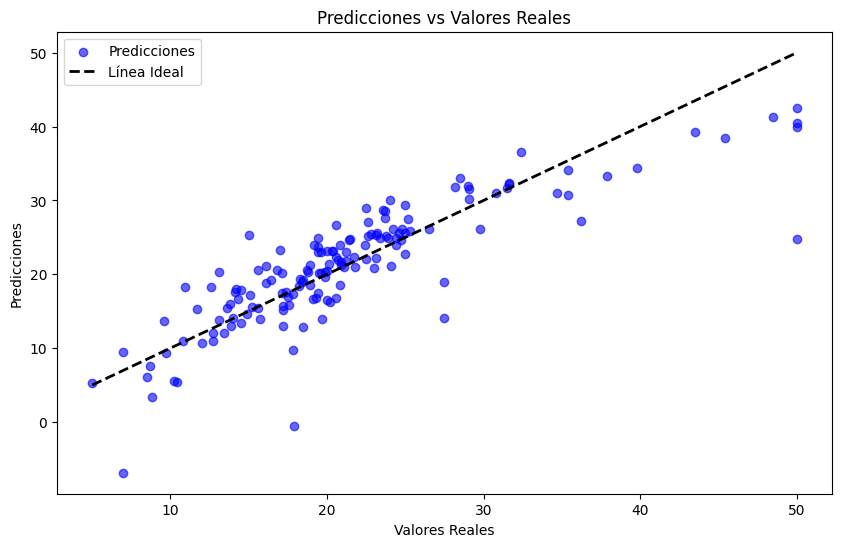

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Seleccionar la característica y la variable objetivo
X = housing.drop(['medv'], axis = 1)
y = housing['medv']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones y evaluacion
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

# Grafico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

## SVR
Con el mismo set de entrenamiento y testeo, evaluo el modelo SVR.

Error Cuadrático Medio (MSE): 25.96
Coeficiente de Determinación (R²): 0.65


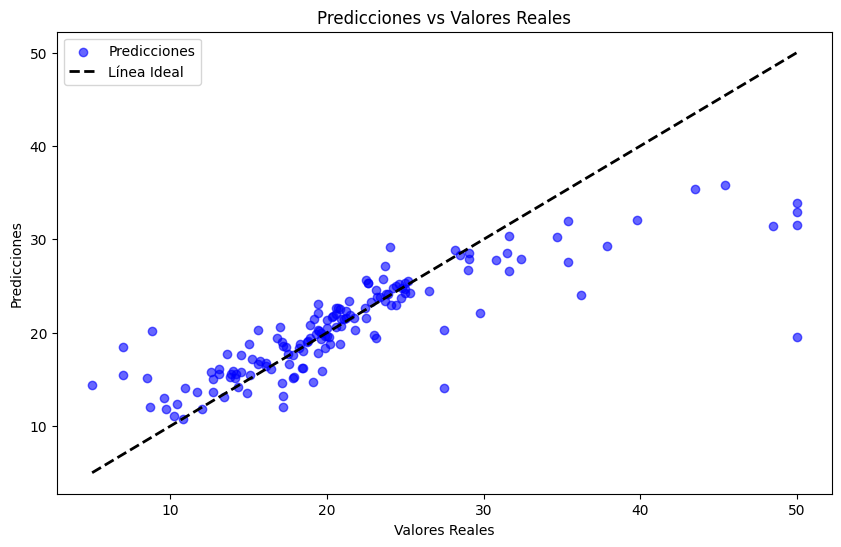

In [105]:
from sklearn.svm import SVR

# Creacion del modelo de SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Prediccion y evaluacion
y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

# Grafico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

## Conclusiones
Como era de esperar, el desempeno de SVR es mejor que el de regresion lineal, el plot de datos predichos contra los reales pone de manifiesto, sin embargo, el buen desempeño de los modelos con los datos utilizados.